In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve,f1_score

# Introduction

Support Vector Machine (SVM) is a supervised machine learning algorithm which finds a hyperplane that separates the data into classes. The hyperplane is chosen in such a way that it maximizes the margin between the classes. However, sometimes the example data is not linear separable. In such cases, the SVM algorithm can be extended to use a kernel function to map the data into a higher-dimensional space where it can be linearly separated.  

The main goal of this notebook is to understand the SVM algorithm and how it works.

The operative objectives of this notebook are:

1. To implement the SVM algorithm using the numpy library.
2. To implement the Sequential Minimal Optimization algorithm using the numpy library.
3. To visualize the decision boundary of the SVM algorithm.

Note that this notebook does not talk about the hyperparameter optimization of the algorithm or how to choose the kernel function. 

# Mathematical Background

On this part I will define the mathematical background of the SVM algorithm and explain each component of the algorithm.

## Hyperplane and Margin

In the context of Support Vector Machines (SVM), the goal is to find the optimal hyperplane that separates different classes of data points. The hyperplane can be defined as:

$$w^Tx + b = 0$$

where $w$ is the normal vector to the hyperplane and $b$ is the bias term. The distance between the hyperplane and a certain data point $x$ is given by:

$$\frac{|w^Tx + b|}{||w||}$$

where $||w||$ is the norm of the normal vector $w$.

The margin of the SVM algorithm is defined as the distance between the hyperplane and the nearest data point from either of the two classes (positive and negative). This margin is a crucial aspect of SVM as it determines the generalization ability of the classifier. The margin can be expressed as:

$$\frac{2}{||w||}$$

Maximizing this margin is the primary objective in SVM training, as it helps to achieve better separation between classes and improves the model's robustness to new, unseen data.

## Desicion Boundary

The decision boundary in Support Vector Machines (SVM) is given by:

$$w^Tx + b \geq 0$$

If $w^Tx + b \geq 0$ then the data point $x$ belongs to class 1; otherwise, it belongs to class 2. However, using just the decision boundary does not necessarily maximize the margin between the classes, and some points might lie directly on the hyperplane. To ensure a margin is maintained, we introduce the following constraints:

$$w^Tx_- + b \leq -1$$
$$w^Tx_+ + b \geq 1$$

where $x_-$ and $x_+$ data points from the negative and positive classes respectively. To simplify this problem we can define $y_i = -1$ for the negative examples and $y_i = +1$ for the positive examples and multiply each constraint by the corresponding $y_i$. This gives us the following constraint:

* if $y_i = -1$ then $y_i(w^Tx_i + b) \leq -1 \rightarrow y_i(w^Tx_i + b) \geq 1$ 
* if $y_i = 1$ then $y_i(w^Tx_i + b) \geq 1$ remains the same.

We can now use this constraint in the optimization problem for both classes:

$$y_i(w^Tx_i + b) \geq 1$$

By incorporating this constraint, we maximize the margin between the classes while also simplifying the problem, leading to better generalization and robustness of the SVM model.


## Optimization Problem

To find the hyperplane the maximizes the margin we can solve the following optimization problem:

$$\text{minimize} \quad \frac{1}{2}||w||^2$$

subject to the constraints:

$$y_i(w^Tx_i + b) \geq 1 \quad \text{for} \quad i = 1,2,...,l$$

where $l$ is the number of training examples. So, we have a constraint and an optimization problem thus we can use the method of Lagrange multipliers to solve it. The Lagrangian for this problem is given by:

$$L(w,b,\alpha) = \frac{1}{2}||w||^2 - \sum_{i=1}^{l}\alpha_i[y_i(w^Tx_i + b) - 1]$$

$$\alpha_i \geq 0 \quad \text{for} \quad i = 1,2,...,l$$

where $\alpha_i$ are the Lagrange multipliers. The optimization problem can be solved by taking the partial derivatives of the Lagrangian with respect to $w$ and $b$ and setting them to zero: 

$$\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^{l} \alpha_i y_i \mathbf{x}_i = 0$$


$$\frac{\partial \mathcal{L}}{\partial b} = -\sum_{i=1}^{l} \alpha_i y_i = 0$$

Thus, we get:

$$w = \sum_{i=1}^{l} \alpha_i y_i x_i$$

and

$$\sum_{i=1}^{l} \alpha_i y_i = 0$$

By solving these equations, we can determine the optimal value of $w$ and $b$, which define the hyperplane that maximizes the margin between the classes.


## Dual Form

The optimization problem can be converted into the dual form by substituting the value of $w$ back into the Lagrangian while making sure $$\sum_{i=1}^{l} \alpha_i y_i = 0$$ holds true. This leads to the following dual formulation:


$$\mathcal{L}(\alpha) = \sum_{i=1}^{l} \alpha_i - \frac{1}{2} \sum_{i=1}^{l} \sum_{j=1}^{l} \alpha_i \alpha_j y_i y_j x_i^Tx_j$$

In this dual form, the objective is to maximize $\mathcal{L}(\alpha)$ with respect to $\alpha$, subject to the constraints:

$$\alpha_i \geq 0 \quad \text{for} \quad i = 1,2,...,l$$

$$\sum_{i=1}^{l} \alpha_i y_i = 0$$

From the dual form, we see that the maximum margin hyperplane is a linear combination of the training example. This means that the maximization of the margin depends only on the dot product of $x_i$ and $x_j$. Therefore, we can write the decision function as:

$$f(x) = \sum_{i=1}^{l} \alpha_i y_i x_i^Tx + b$$

This shows that only a subset of the training examples (those corresponding to non-zero $\alpha_i$) are used in defining the decision boundary. These training examples are known as support vectors.



## Kernel SVM

When the data is not linearly separable it is possible to map it into a higher-dimensional space where it can be linearly separated. However, this mapping can be computationally expensive. To avoid this, we can use the kernel trick. The kernel trick allows us to compute the dot product of the mapped data without actually performing the mapping. The kernel function is defined as:

$$K(x_i,x_j) = \phi(x_i)^T\phi(x_j)$$

where $\phi$ is the mapping function. The most common kernel functions are:

* Linear kernel: $K(x_i,x_j) = x_i^Tx_j$
* Polynomial kernel: $K(x_i,x_j) = (x_i^Tx_j + c)^d$
* Gaussian kernel: $K(x_i,x_j) = \exp(-\frac{||x_i - x_j||^2}{2\sigma^2})$


Applying the kernel function to the dual form we get:

$$\mathcal{L}(\alpha) = \sum_{i=1}^{l} \alpha_i - \frac{1}{2} \sum_{i=1}^{l} \sum_{j=1}^{l} \alpha_i \alpha_j y_i y_j K(x_i,x_j)$$

In this formulation the kernel function $K(x_i,x_j)$ replaces the dot product of the mapped data, allowing us to work in higher-dimensional space without explicitly computing the coordinates of the data in that space. This signifcantly reduces the computational cost of the SVM algorith.

## Prediction

To predict the class of a new data point $x$ we can use the following formula:

$$\hat{y} = sign(\sum_{i=1}^{l} \alpha_i y_i K(x_i,x) + b)$$

where $sign$ is the sign function.

## Dual Form Disadvantage

Not all data sets are linearly separable, meaning there may be no hyperplane that can perfectly separate the examples from one class from the examples of the other class. his limitation arises because the dual form only bounds the Lagrange multipliers from below by zero. To address this problem, Cortes and Vapnik (1995) suggested adding the term $C$ and slack variables $\xi_i$ to the optimization problem. The new optimization problem is given by:

$$\text{minimize} \quad \frac{1}{2}||w||^2 + C\sum_{i=1}^{l}\xi_i$$

$$ \text{subject to} \quad y_i(w^Tx_i - b) \geq 1 - \xi_i$$

where $C$ is the regularization parameter and $\xi_i$ are the slack variables. 

When transforming the above optimization problem we change the bounds of the Lagrange multipliers from below by zero to $0 \leq \alpha_i \leq C$.

The parameter $C$ controls the trade-off between maximizing the margin and minimizing the classification error. A large value of $C$ will lead to a smaller margin but fewer errors on the training set, while a small values of $C$ will lead to a larger margin but more errors on the training set. Thus, the parameter $C$ can control the bias-variance trade-off of the SVM model.

## Sequential Minimal Optimization (SMO)


The optimization problem can be solved using the Sequential Minimal Optimization (SMO) algorithm introduced by (Platt, 1998).  In the research paper the author uses the following formula for defining a hyperplane: $$y = w^Tx - b$$ and the dual form optimization problem is given by:

$$\min_{\alpha}\Psi(\alpha)  = \frac{1}{2} \sum_{i=1}^{l} \sum_{j=1}^{l} \alpha_i \alpha_j y_i y_j K(x_i,x_j) - \sum_{i=1}^{l} \alpha_i$$

Namley, he multiplied the dual form by -1 to convert the maximization problem into a minimization problem.

The above changes the prediction formula to:

$$\hat{y} = sign(\sum_{i=1}^{l} \alpha_i y_i K(x_i,x) - b)$$

### Solving for Two Lagrange Multipliers

The SMO algorithm works by choosing two Lagrange multipliers $\alpha_i$ and $\alpha_j$ and optimizing them while keeping the other multipliers constant. To compute for the two multipliers SMO first computes the constraints on these multipliers and then solves for the constrained minimum. The fact that we use only two multipliers at a time makes it easy to display the algorithm in a 2D space. The constraint $0 \leq \alpha_i \leq C$ cause the multipliers to lie in a box and the constraint $\sum_{i=1}^{l} \alpha_i y_i = 0$ cause the multipliers to lie on a  diagonal line. Thus, the constrained minimum of the objective function lies on the diagonal line. 

The way we can compute the ends of the diagonal line is by using the following formulas:

$$ L = \max(0, \alpha_j - \alpha_i)*t + \max(0,\alpha_j+\alpha_i+C)*(1-t) , H = \min(C, C + \alpha_j - \alpha_i)*t + \min(C, \alpha_j + \alpha_i) *(1-t)$$

Where $t = 1$ if $y_i \neq y_j$ and $t = 0$ if $y_i = y_j$.

To determine whether the constrained optimum is minimum or maximum, we can compute the second derivative of the objective function along the diagonal line. The second derivative is given by:

$$\eta = K(x_i,x_i) + K(x_j,x_j) - 2K(x_i,x_j)$$

if $\eta > 0$, then the constrained optimum is minimum, and we can update the multipliers using the following formula:

$$\alpha_j = \alpha_j + \frac{y_j(E_i - E_j)}{\eta}$$

Where $E_i$ and $E_j$ are the errors of the two multipliers (i.e. $E_i = f(x_i) - y_i$ and $E_j = f(x_j) - y_j$).

Next, we need to clip the multiplier $\alpha_j$ to lie within the box. The clipping is done using the following formulas:

$$\alpha_{j}^{new, clipped} = \min(\max(\alpha_{j}^{new}, L), H)$$

Then, we update $\alpha_i$ using the following formula:

$$\alpha_{i}^{new} = \alpha_i + y_iy_j(\alpha_j - \alpha_{j}^{new, clipped})$$


### Choosing the Multipliers

The SMO algorithm chooses the two multipliers using the following criteria:

1. The first multiplier is chosen by selecting the one that violates the KKT conditions the most. The KKT conditions are given by:

$$\alpha_i = 0 \rightarrow y_i f(x_i) \geq 1$$

$$0 < \alpha_i < C \rightarrow y_i f(x_i) = 1$$

$$\alpha_i = C \rightarrow y_i f(x_i) \leq 1$$

where $f(x_i) = \sum_{i=1}^{l} \alpha_i y_i K(x_i,x) - b$.

2. The second multiplier is chosen by selecting the one that gives the maximum step size (i.e. $|E_i - E_j|$) which is one of many heuristics that can be used.

In this notebook I will choose the multipliers by iterating over all the values of $\alpha_i$ and choose $\alpha_j$ randomly.


### Computing the Bias Term (Threshold)

The bias term b is computed after each step in order to fullfil the KKT conditions for both multipliers. We compute the bias term using the following formulas:

$$b_1 = E_i + y_i K(x_i,x_i)(\alpha_i^{new} - \alpha_i) + y_j K(x_i,x_j)(\alpha_j^{new} - \alpha_j) + b$$

$$b_2 = E_j + y_i K(x_i,x_j)(\alpha_i^{new} - \alpha_i) + y_j K(x_j,x_j)(\alpha_j^{new} - \alpha_j) + b$$

If $0 < \alpha_i < C$ then $b = b_1$. Otherwise, if $0 < \alpha_j < C$ then $b = b_2$. If niether condition is met, then $b = \frac{b_1 + b_2}{2}$.

### Computing the Weights (Normal Vector)

The weights are computed after each step using the following formula:

$$w^{new} = w+y_i(\alpha_{i}^{n} - \alpha_i)x_i+y_j(\alpha_{j}^{new,clipped} - \alpha_j)x_j$$


# Python Implementation

On this part I will solve the dual form optimization problem using Numpy. The SMO algorithm will be implmented using the following steps:

1. Initialize the Lagrange multipliers $\alpha$ and the bias term $b$.
2. Choose two Lagrange multipliers $\alpha_i$ and $\alpha_j$.
3. Compute the error of the two multipliers.
4. Compute the bounds of the two multipliers.
5. Compute the second derivative of the objective function.
6. Update the multipliers.
7. Clip the multipliers.
8. Compute the bias term.
9. Compute the weights.
10. Repeat steps 2-9 until convergence.

Note that I will use the linear kernel function and will stop the algorithm when the number of iterations reaches a certain number.
Also note that, I will not choose $\alpha_i$ based on the KKT conditions but will iterate over the values of $\alpha_i$ and choose $\alpha_j$ randomly.

In [3]:
# Load the iris dataset
iris = load_iris()
X = iris.data[:,:2]
y = iris.target
y = y[:100]
y[y==0] = -1
X = X[:100,:]

## Helpers 

In [4]:
def ChooseJ(i,m):
    j = np.random.randint(0,m)
    while j == i:
        j = np.random.randint(0,m)
    return j

def Eta(X,i,j):
    return np.dot(X[i],X[i]) + np.dot(X[j],X[j]) - 2*np.dot(X[i],X[j]) 

def ComputeBounds(y,alpha,i,j,C):
    t = (y[i] != y[j])*1
    H = min(C,C+alpha[j] - alpha[i])*t + min(C, alpha[j] + alpha[i])*(1-t)
    L = max(0, alpha[j] - alpha[i])*t + max(0, alpha[j] + alpha[i] - C)*(1-t)
    return L,H

def Err(X, y, alpha, b, i):
    u_i = np.dot((alpha*y).T,np.dot(X, X[i].T)) - b
    return u_i - y[i]

def ClipAlpha(alpha,H,L,j):
    if alpha[j] >= H:
        alpha[j] = H
    elif alpha[j] <= L:
        alpha[j] = L
    return alpha[j]

def ComputeB(x_i,x_j,y_i,y_j,alpha_i,alpha_j,old_alpha_i,old_alpha_j,Ei,Ej,b,C):

    b1 = Ei+y_i*(alpha_i - old_alpha_i)*np.dot(x_i,x_i)+y_j*(alpha_j-old_alpha_j)*np.dot(x_i,x_j)+b
    b2 = Ej+y_i*(alpha_i - old_alpha_i)*np.dot(x_i,x_j)+y_j*(alpha_j-old_alpha_j)*np.dot(x_j,x_j)+b

    if 0 < alpha_i < C:
        b = b1
    elif 0 < alpha_j < C:
        b = b2
    else:
        b = (b1+b2)/2
    return b

## SMO Implementation

In [12]:
def SMO(X,y,C=1,tol=1e-3, max_passes = 1000):
    m,n = X.shape
    alpha = np.zeros(m)
    alpha_old = np.zeros(m)
    b = 0
    w = np.zeros(n)

    passes = 0

    while passes < max_passes:

        for i in range(m):
            j = ChooseJ(i,m)
            L,H = ComputeBounds(y,alpha,i,j,C)
            eta = Eta(X,i,j)
            if eta <= 0:
                continue
            alpha_old[i] = alpha[i]
            alpha_old[j] = alpha[j]
            alpha_j_old = alpha[j]
            alpha_i_old = alpha[i]

            Ei = Err(X,y,alpha,b,i)
            Ej = Err(X,y,alpha,b,j)

            alpha[j] = alpha_j_old + y[j]*(Ei - Ej)/eta
            alpha[j] = ClipAlpha(alpha,H,L,j)

            if abs(alpha[j] - alpha_j_old) < tol:
                continue

            alpha[i] = alpha_i_old + y[i]*y[j]*(alpha_j_old - alpha[j])

            b = ComputeB(X[i],X[j],y[i],y[j],alpha[i],alpha[j],alpha_i_old,alpha_j_old,Ei,Ej,b,C)
            w += y[i]*(alpha[i] - alpha_i_old)*X[i] + y[j]*(alpha[j] - alpha_j_old)*X[j]

        if np.linalg.norm((alpha - alpha_old)) < tol:
            break
        passes += 1
    print("Number of passes: ",passes)
    return alpha,b,w

In [13]:
alpha,b,w = SMO(X,y)

Number of passes:  10


In [14]:
y_hat = np.sign(np.dot(X,w) - b)
acc = np.mean(y_hat == y)
print('Accuracy: ',acc)

Accuracy:  1.0


## Visualization

In [8]:
def createGrid(X,w,b):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    Z = np.sign(np.dot(grid,w) - b)
    zz = Z.reshape(xx.shape)
    return xx,yy,zz

In [9]:
def plot_decision_boundary(X,w,b):
    xx,yy,zz = createGrid(X,w,b)
    plt.contourf(xx,yy,zz,cmap='Paired')
    for class_value in [-1,1]:
        row_ix = np.where(y == class_value)
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=f'Class {class_value}')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.title('SVM Decision Boundary (Linear Kernel) SMO Algorithm')
    plt.show()

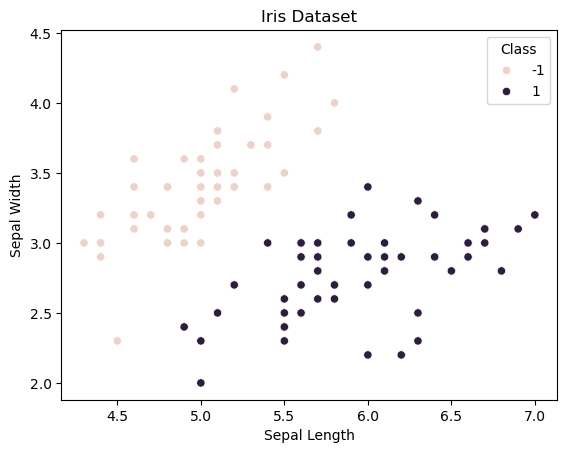

In [15]:
import seaborn as sns

df = pd.DataFrame(X,columns=['Sepal Length','Sepal Width'])
df = pd.concat([df,pd.Series(y,name='Class')],axis=1)
sns.scatterplot(data=df,x='Sepal Length',y='Sepal Width',hue='Class');
plt.title('Iris Dataset')
plt.show()

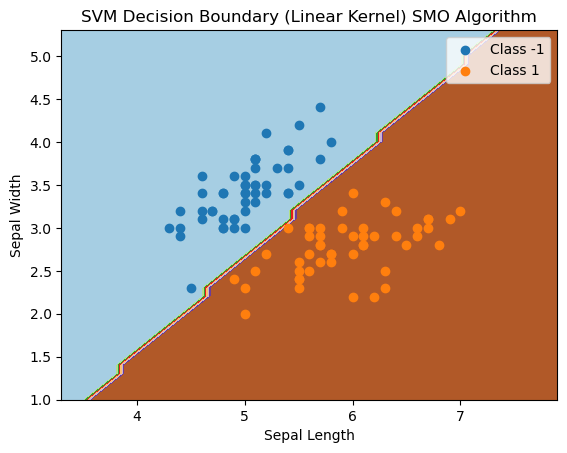

In [16]:
plot_decision_boundary(X,w,b)

# Conclusion

In this notebook, I implemented the SMO algorithm for finding the optimal Lagrange multipliers of the SVM algorithm optimization problem. The model succeed on prediction the classes of the data points. However, the iris data is a simple dataset and the model might need some optimization (hyperparameter tuning) to work on more complex datasets.

# Discussion

While the SVM algorithm seem to have managed to classify the unseen data (test data) correctly, it is important to note that the algorithm needs to be tuned.  In practice, the hyperparameters are optimized using tuning techniques which are not covered by this notebook. In addition, the SVM algorithm can be extended to solve multi-class classification problems which is also not covered by this notebook.

# Bibliography

Cortes, C., & Vapnik, V. (1995). Support-vector networks. Machine learning, 20(3), 273-297.

Jakkula, V. (2006). Tutorial on support vector machine (svm). School of EECS, Washington State University, 37(2.5), 3.

MIT OpenCourseWare. (2014, January 10). 16. Learning: support vector machines [Video]. YouTube. https://www.youtube.com/watch?v=_PwhiWxHK8o

Platt, J. (1998). Sequential minimal optimization: A fast algorithm for training support vector machines.

